In [14]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
sigmoid(1)

0.7310585786300049

In [16]:
sigmoid(np.array([2,1,0]))

array([0.88079708, 0.73105858, 0.5       ])

In [17]:
import matplotlib.pylab as plt
x=np.array([2,1,0])
y=sigmoid(x)
plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

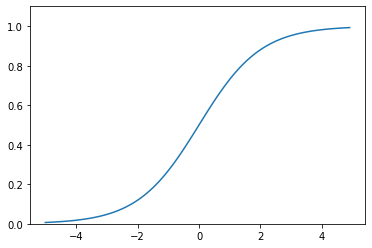

In [18]:
import matplotlib.pylab as plt
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(0,1.1)
plt.show()

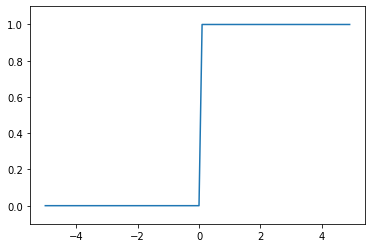

In [19]:
def step_function(x):
    y=x>0
    return y.astype(np.int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [20]:
np.int

int

In [21]:
def relu(x):
    return np.maximum(x,0)

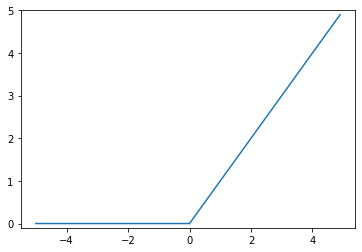

In [22]:
x=np.arange(-5.0,5.0,0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-0.1,5)
plt.show()

In [23]:
A=np.array([1,2,3,4])
print(np.ndim(A))
A.shape

1


(4,)

In [24]:
B=np.array([[1,2],[3,4],[5,6]])
print(np.ndim(B))
B.shape

2


(3, 2)

In [25]:
C=np.array([[[-1,-2,1,0],[-4,2,0,1]],[[3,4,1,0],[5,6,0,1]],[[3,4,1,0],[5,6,0,1]]])
print(np.ndim(C))
C.shape

3


(3, 2, 4)

In [26]:
E=np.array([[1,2],[3,4]])
F=np.array([[1,0],[1,1]])

G=np.dot(E,F)

In [27]:
G

array([[3, 2],
       [7, 4]])

In [28]:
def identity_function(x):
    return x

X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])
A1=np.dot(X,W1)+B1
Z1=sigmoid(A1)

W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)

W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])
A3=np.dot(Z2,W3)+B3
Y=identity_function(A3)
Y

array([0.31682708, 0.69627909])

In [29]:
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2]) 
    return network

In [30]:
def forward(network, x):
    a1=np.dot(x, network['W1'])+network['b1']
    z1=sigmoid(a1)
    a2=np.dot(Z1, network['W2'])+network['b2']
    z2=sigmoid(a2)
    a3=np.dot(Z2, network['W3'])+network['b3']
    y=identity_function(a3)
    return y

In [31]:
network=init_network()
x=np.array([1.0,0.5])
y=forward(network, x)
print(y)

[0.31682708 0.69627909]


In [32]:
a=np.array([0.3,2.9,4.0])
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [33]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [34]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み
    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか
    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()

NameError: name '__file__' is not defined

In [35]:
(x_train,t_train), (x_test,t_test)=\
load_mnist(flatten=True, normalize=False)

In [36]:
print(x_train.shape)

(60000, 784)


In [37]:
print(t_train.shape)

(60000,)


In [38]:
print(x_test.shape)
print(t_test.shape)

(10000, 784)
(10000,)


In [39]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) =\
    load_mnist(flatten=True, normalize=False)

img=x_train[0]
label=t_train[0]
print(label)

print(img.shape)
img=img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [46]:
def get_data():
    (x_train,t_train), (x_test,t_test)=load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("dataset/sample_weight.pkl","rb") as f:
        network =pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3=network['W1'], network['W2'], network['W3']
    b1, b2, b3=network['b1'], network['b2'], network['b3']
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=softmax(a3)
    
    return y



In [47]:
x,t=get_data()
network=init_network()
accuracy_cnt=0
for i in range(len(x)):
    y=predict(network, x[i])
    p=np.argmax(y)
    if p==t[i]:
        accuracy_cnt +=1

print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [48]:
x,t=get_data()
network=init_network()
batch_size=100
accuracy_cnt=0

for i in range(0,len(x),batch_size):
    x_batch=x[i:i+batch_size]
    y_batch=predict(network, x_batch)
    p=np.argmax(y_batch, axis=1)
    accuracy_cnt +=np.sum(p==t[i:i+batch_size])

print("Accuracy" +str(float(accuracy_cnt)/len(x)))

Accuracy0.9352


In [134]:
#softmax
#cross_entropy_error
#numerical gradient

import numpy as np

x=np.array([0.6,0.9])

def softmax(z):
    c=np.max(z)
    return np.exp(z-c)/np.sum(np.exp(z-c)) #overflow를 막기 위해서

def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta)) #log안이 0이 되는 것을 막기 위해서

class simpleNetwork:
    def __init__(self):
        self.W=np.random.randn(2,3) #2행3열의 np.array를 만들고 각 원소는 N(0,1)의 임의의 원소
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x,t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        return loss

network=simpleNetwork()
print(network.W)

p=network.predict(x)
print(p)


[[-1.14775642 -1.52569585  0.30828157]
 [ 1.15541565 -0.13920312  1.13082771]]
[ 0.35122023 -1.04070032  1.20271388]


In [135]:
np.argmax(p)

2

In [136]:
t=np.array([0,0,1])

In [137]:
network.loss(x,t)

0.4271433726592513

In [161]:
#f(x1, x2)=x1^2+x2^2
#(2*x1, 2*x2)
print(np.size(x))
def numerical_gradient(f,x): #수치미분
    h=1e-4 #1e-4 정도면 좋은 결과를 얻는다고 알려져 있다
    grad=np.zeros_like(x) #x와 같은 형상의 np.array를 만들고 모든 원소는 0이다
    (row,column) =x.shape
    for i in range(row):
        for j in range(column):
            tmp_val=x[i][j]
            x[i][j]=tmp_val+h
            fxh1=f(x)
        
            x[i][j]=tmp_val-h
            fxh2=f(x)
        
            grad[i][j]=(fxh1-fxh2)/(2*h)
            x[i][j]=tmp_val
    
        """
        xh1=x
        xh2=x #이렇게 변수끼리 서로 같게 놓아버리면 간섭이 발생하는 것 같다.
        xh1[i]+=h
        xh2[i]-=h 
        f_temp=(f(xh1)-f(xh2))/(2*h)
        grad[i]=f_temp
        """
    
    return grad

2


In [162]:
def function_2(x):
    return x[0]**2+x[1]**2

In [163]:
function_2(np.array([3,4]))

25

In [169]:
"""
def f1(x,t):
    return network.loss(x,t)
dW=numerical_gradient(f1,network.W)  #numerical_gradient에서는 f1(W)를 계산하려고 한다. f1은 실제로 x,t를 필요로 하는데. 그래서 오류 생김
"""

def f2(W):
    return network.loss(x,t) #더미함수이다

f3 = lambda w: network.loss(x,t) #간단한 함수라면 이렇게 lambda로 표현할 수도 있다.

a=network.W
print(a)
dW=numerical_gradient(f3,a)
print(dW)

[[-1.14775642 -1.52569585  0.30828157]
 [ 1.15541565 -0.13920312  1.13082771]]
[[ 0.16704986  0.04152816 -0.20857802]
 [ 0.25057479  0.06229224 -0.31286703]]


In [1]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta)) #log안이 0이 되는 것을 막기 위해서

def numerical_gradient(f,x): #수치미분
    h=1e-4 #1e-4 정도면 좋은 결과를 얻는다고 알려져 있다
    grad=np.zeros_like(x) #x와 같은 형상의 np.array를 만들고 모든 원소는 0이다
    if len(x.shape)==2:
        (row,column) =x.shape
        for i in range(row):
            for j in range(column):
                tmp_val=x[i][j]
                x[i][j]=tmp_val+h
                fxh1=f(x)
            
                x[i][j]=tmp_val-h
                fxh2=f(x)
            
                grad[i][j]=(fxh1-fxh2)/(2*h)
                x[i][j]=tmp_val
    
        """
        xh1=x
        xh2=x #이렇게 변수끼리 서로 같게 놓아버리면 간섭이 발생하는 것 같다.
        xh1[i]+=h
        xh2[i]-=h 
        f_temp=(f(xh1)-f(xh2))/(2*h)
        grad[i]=f_temp
        """
    else: 
        for i in range(x.size):
            tmp_val=x[i]
            x[i]=tmp_val+h
            fxh1=f(x)
            
            x[i]=tmp_val-h
            fxh2=f(x)
            
            grad[i]=(fxh1-fxh2)/(2*h)
            x[i]=tmp_val
    return grad

class TwoLayerNetwork:
    def __init__ (self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2']=np.zeros(output_size)
    
    def predict(self, x):
        W1, W2=self.params['W1'],self.params['W2']
        b1, b2=self.params['b1'],self.params['b2']
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    
    def loss(self, x, t):
        y=self.predict(x)
        return cross_entropy_error(y,t)

    def accuracy(self, x, t):
        y=self.predict(x)
        max_y=np.argmax(y, axis=1) #axis=1은 가로로 즉 한 행에서 비교. axis=2는 세로로 즉 한 열에서 비교
        #argmax는 최댓값이 있는 위치 인덱스들을 (axis=1, or 0의 경우) array의 형태로 가져다 준다. axis가 없으면 그냥 처음부터 세서 숫자.
        return np.sum(max_y==t)/float(x.shape[0]) #max_y=np.array([1,2,3,4]) t=np.array([1,0,3,0]) max_y==t는 array([ True, False,  True, False]).

    def numerical_gradients(self, x, t):
        loss_w = lambda w: network.loss(x,t)
        grads={}
        grads['W1']=numerical_gradient(loss_w, self.params['W1'])
        grads['b1']=numerical_gradient(loss_w, self.params['b1'])
        grads['W2']=numerical_gradient(loss_w, self.params['W2'])
        grads['b2']=numerical_gradient(loss_w, self.params['b2'])
        return grads

In [2]:
x=np.random.randn(100,784)
t=np.random.randn(100,10)
network=TwoLayerNetwork(input_size=784, hidden_size=50, output_size=10)
y=network.predict(x)
grads=network.numerical_gradients(x,t)

In [3]:
grads

{'W1': array([[-0.12477162,  0.14124747, -0.1644578 , ...,  0.07632519,
          0.06318795, -0.04504713],
        [-0.02748994,  0.06238105, -0.06136962, ...,  0.00128688,
         -0.05380171, -0.03594969],
        [ 0.0408351 , -0.00416343,  0.1223124 , ..., -0.10448183,
          0.14689161,  0.09924777],
        ...,
        [ 0.0260963 , -0.03598584, -0.07372158, ...,  0.02327392,
         -0.10040631, -0.00652193],
        [ 0.07638651, -0.10823483, -0.05734985, ...,  0.01532982,
         -0.11021586,  0.14246445],
        [ 0.11691917, -0.00481307,  0.04293999, ..., -0.09647194,
          0.05847164,  0.03474321]]),
 'b1': array([ 0.08016994,  0.05242034,  0.02572294,  0.05057659, -0.01628862,
        -0.06380848, -0.08498095, -0.02434337, -0.00808239,  0.0407761 ,
        -0.063775  ,  0.0290495 ,  0.21711645, -0.00146095, -0.04119988,
        -0.00702767,  0.0541073 , -0.07380013,  0.09940893, -0.06789567,
        -0.06793339,  0.05494376,  0.06281384,  0.01350314, -0.014568

In [4]:
from dataset.mnist import load_mnist
import time
start=time.time()

(x_train, t_train), (x_test, t_test)= load_mnist(normalize=True, one_hot_label=True)
train_size= x_train.shape[0]
batch_size=100
learning_rate=0.1
network=TwoLayerNetwork(input_size=784, hidden_size=50, output_size=10)
iters_num=700
train_loss_list=[]
train_acc_list=[]
test_acc_list=[]
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    batch_points=np.random   .choice(train_size,batch_size)
    x_batch=x_train[batch_points]
    t_batch=t_train[batch_points]
    
    grad=network.numerical_gradients(x_batch, t_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]

    loss=network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print(str(i+1)+"th trial: "+str(loss))
    if ((i+1) % iter_per_epoch)==0:
        train_acc=network.accuracy(x_train, t_train)
        test_acc=network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc:"+str(train_acc)+","+str(test_acc))
    print(str((time.time()-start)/60)+" minutes passed")

1th trial: 1250.8881053838109
0.3193487604459127 minutes passed
2th trial: 730.4248890699808
0.6389486352602641 minutes passed
3th trial: 707.185642995558
0.9575625697771708 minutes passed
4th trial: 693.282112830496
1.2778141657511393 minutes passed
5th trial: 686.158244580172
1.5962609767913818 minutes passed
6th trial: 684.8214887856045
1.9127860228220621 minutes passed
7th trial: 687.7412256522076
2.2305476665496826 minutes passed
8th trial: 688.8622813556018
2.5536736090977987 minutes passed
9th trial: 684.7185211565584
2.87499471505483 minutes passed
10th trial: 686.3873259613098
3.1992235660552977 minutes passed
11th trial: 680.0223105193671
3.5225166002909343 minutes passed
12th trial: 685.6235063879203
3.845960028966268 minutes passed
13th trial: 683.6746382252229
4.171057856082916 minutes passed
14th trial: 676.3510801092445
4.495554085572561 minutes passed
15th trial: 682.3728147645401
4.818145259221395 minutes passed
16th trial: 679.9002260979662
5.138764508565267 minutes p

130th trial: 676.1962254215634
42.01225153207779 minutes passed
131th trial: 651.4384701508764
42.33616288503011 minutes passed
132th trial: 651.5124348618058
42.65958960851034 minutes passed
133th trial: 671.6409273178961
42.98338396946589 minutes passed
134th trial: 635.6006868896075
43.30517299969991 minutes passed
135th trial: 629.7653549368138
43.630153846740725 minutes passed
136th trial: 673.4809254634467
43.95195959409078 minutes passed
137th trial: 673.0143532474544
44.2742165406545 minutes passed
138th trial: 657.566235667915
44.59781036376953 minutes passed
139th trial: 684.154874857586
44.922406860192616 minutes passed
140th trial: 645.2092903157932
45.2457333167394 minutes passed
141th trial: 642.1985518830438
45.56971150239308 minutes passed
142th trial: 629.9235480478758
45.89263688723246 minutes passed
143th trial: 624.0342657150647
46.21614716450373 minutes passed
144th trial: 634.6050775403835
46.54164606332779 minutes passed
145th trial: 639.7890509074168
46.86453802

259th trial: 716.3226652183306
83.97838087876637 minutes passed
260th trial: 663.6408199575202
84.29981898466745 minutes passed
261th trial: 631.3813861696085
84.62232659260432 minutes passed
262th trial: 607.9528214044299
84.94602067867915 minutes passed
263th trial: 630.6291829345995
85.27009913126628 minutes passed
264th trial: 658.5043942830084
85.59974238872528 minutes passed
265th trial: 608.4142157055873
85.94178527196249 minutes passed
266th trial: 627.634304292787
86.26720062096913 minutes passed
267th trial: 709.5620320930046
86.58987534046173 minutes passed
268th trial: 653.8758158355643
86.91293443838755 minutes passed
269th trial: 631.05807558795
87.2373470902443 minutes passed
270th trial: 611.7142944111913
87.56207727988561 minutes passed
271th trial: 626.302802929647
87.88697458505631 minutes passed
272th trial: 609.883583630138
88.21162121693293 minutes passed
273th trial: 632.8052222824308
88.53466356595358 minutes passed
274th trial: 633.3131405230472
88.857371715704

387th trial: 592.2728819943002
125.42668321530024 minutes passed
388th trial: 599.4977119522175
125.75051099061966 minutes passed
389th trial: 724.8565257775414
126.0732024272283 minutes passed
390th trial: 649.4704917710602
126.39641190767288 minutes passed
391th trial: 590.0804453736653
126.7193707148234 minutes passed
392th trial: 610.5972580650197
127.04249663352967 minutes passed
393th trial: 614.4196672705493
127.366859181722 minutes passed
394th trial: 695.2208684397817
127.69090420802435 minutes passed
395th trial: 730.7756967147681
128.01147332986196 minutes passed
396th trial: 710.9339940721904
128.33398093779883 minutes passed
397th trial: 662.855099192568
128.65782543818156 minutes passed
398th trial: 669.0250269566732
128.98011580705642 minutes passed
399th trial: 740.928776934225
129.30105256636938 minutes passed
400th trial: 721.8889256198239
129.62309226195018 minutes passed
401th trial: 725.7983944678673
129.94641872644425 minutes passed
402th trial: 698.6200253078869


514th trial: 617.9649769227553
166.50212737719218 minutes passed
515th trial: 598.8521366331322
166.82593845923742 minutes passed
516th trial: 624.5056329340239
167.14797815481822 minutes passed
517th trial: 660.1473860385618
167.47061945199965 minutes passed
518th trial: 564.6016747295505
167.79367854595185 minutes passed
519th trial: 601.851984774273
168.1191440184911 minutes passed
520th trial: 586.6064050880326
168.44168503284453 minutes passed
521th trial: 557.0119567688575
168.76466055313747 minutes passed
522th trial: 557.292419203694
169.08716816107432 minutes passed
523th trial: 572.6732002220264
169.41099595626196 minutes passed
524th trial: 553.0771173923013
169.7359767993291 minutes passed
525th trial: 585.2068912166139
170.05868495702742 minutes passed
526th trial: 639.0944378617321
170.38164376417797 minutes passed
527th trial: 602.8224872705134
170.70411794583003 minutes passed
528th trial: 576.027882414471
171.0273441473643 minutes passed
529th trial: 638.5153523086682


C:\Users\KEONHI LEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


train acc, test acc:0.0,0.0
194.33514071702956 minutes passed
601th trial: 676.5425187295236
194.6594531218211 minutes passed
602th trial: 673.7451190085644
194.98140926361083 minutes passed
603th trial: 628.6999991542566
195.30505322217942 minutes passed
604th trial: 617.3922343086133
195.6298836827278 minutes passed
605th trial: 633.0958694833771
195.9516392906507 minutes passed
606th trial: 655.725045837836
196.2746148109436 minutes passed
607th trial: 644.600215561099
196.5982754945755 minutes passed
608th trial: 610.3384147666027
196.92278842926027 minutes passed
609th trial: 628.4039398240201
197.2453629096349 minutes passed
610th trial: 573.7929156808241
197.56740258137384 minutes passed
611th trial: 570.2393112563415
197.88942557175955 minutes passed
612th trial: 571.169749014649
198.2126016219457 minutes passed
613th trial: 667.0568253535363
198.53841803471246 minutes passed
614th trial: 638.7868247647251
198.86087550322216 minutes passed
615th trial: 665.7190287163285
199.184

In [13]:
#x=np.array([2,3,4,5,6,7,8])
#index=np.array([1,4])
#x[index]
#결과는 array([3, 6])
#인덱스에도 np.array 넣을 수 있음

In [18]:
train_loss_list

[876.5154768511645,
 740.4095459827915,
 718.494883990528,
 697.050421308937,
 689.9161023456481,
 689.0225010742273,
 684.3992202908341,
 687.0332516913331,
 687.41446015324,
 687.6868954934498]